In [6]:
# Task 1: Load and Explore the Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [7]:
#Load dataset with error handling
try:
    iris_raw = load_iris(as_frame=True)
    df = iris_raw.frame
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully!


In [10]:
# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Explore structure
print("\nDataset Info:")
print(df.info())

# Check missing values
print("\nMissing values:")
print(df.isnull().sum())



First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target     

In [11]:

# Clean dataset (if needed)
df_cleaned = df.dropna()
print(f"\nAfter cleaning, shape is: {df_cleaned.shape}")

# Task 2: Basic Data Analysis
print("\nBasic Statistics:")
print(df_cleaned.describe())

# Grouping: Mean of numeric columns per species
grouped = df_cleaned.groupby('target').mean(numeric_only=True)
print("\nMean values by species (target):")
print(grouped)

# Add species names for better readability
df_cleaned['species'] = df_cleaned['target'].map(dict(enumerate(iris_raw.target_names)))


After cleaning, shape is: (150, 5)

Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Mean values by s

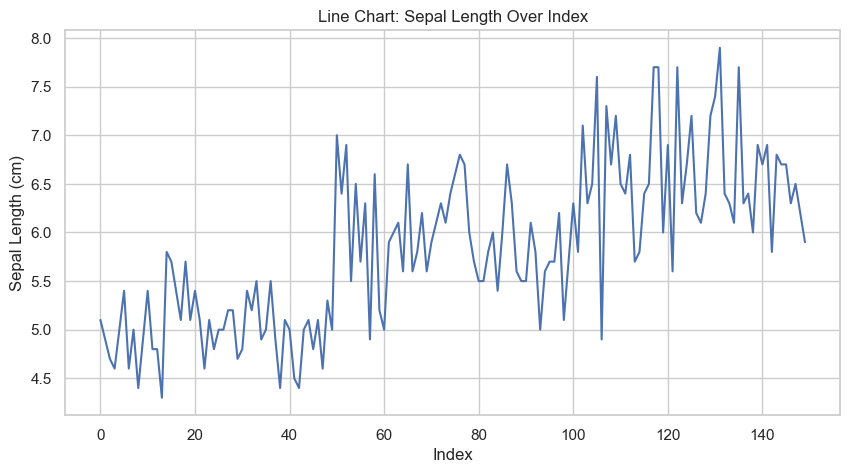

In [12]:

# Task 3: Data Visualization
sns.set(style="whitegrid")

# Line Chart – Simulate a trend (just for demo)
df_cleaned['index'] = df_cleaned.index
plt.figure(figsize=(10, 5))
sns.lineplot(x='index', y='sepal length (cm)', data=df_cleaned)
plt.title("Line Chart: Sepal Length Over Index")
plt.xlabel("Index")
plt.ylabel("Sepal Length (cm)")
plt.show()

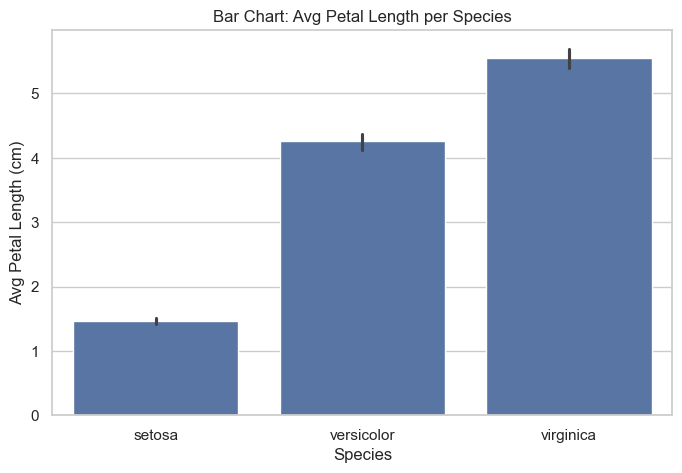

In [13]:

# Bar Chart – Average petal length per species
plt.figure(figsize=(8, 5))
sns.barplot(x='species', y='petal length (cm)', data=df_cleaned, estimator='mean')
plt.title("Bar Chart: Avg Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Avg Petal Length (cm)")
plt.show()


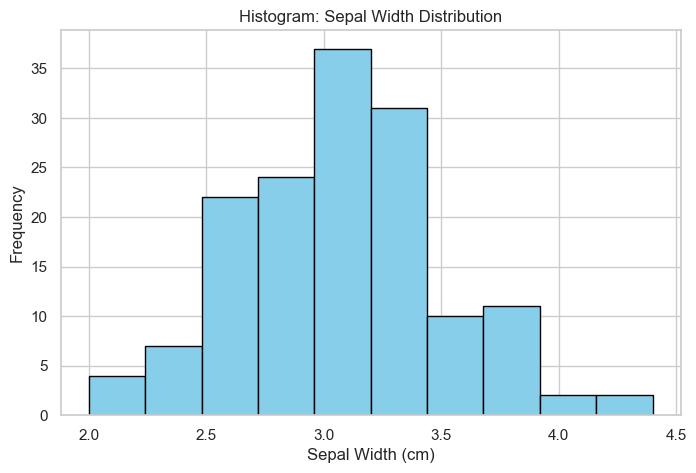

In [14]:
# Histogram – Distribution of sepal width
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned['sepal width (cm)'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram: Sepal Width Distribution")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()


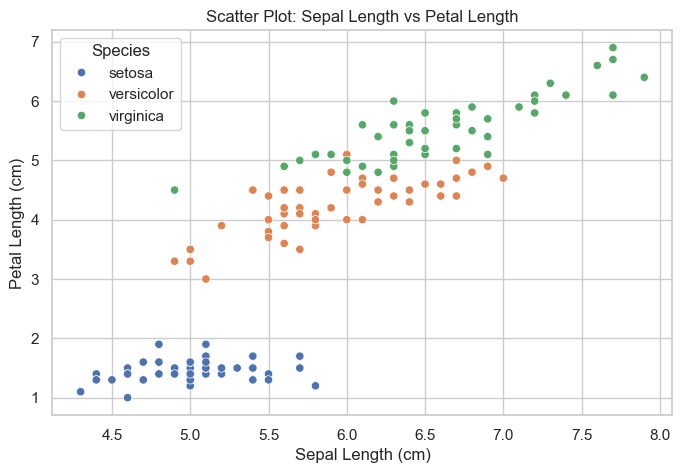

In [15]:

# Scatter Plot – Sepal vs Petal Length
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df_cleaned)
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title='Species')
plt.show()
